In [1]:
import datetime

import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def importdata():
    dataframe = pd.read_csv('../data/df_points_18-19-20-21_v1_weather_final.csv')
    return dataframe.sort_values(by=['dt_start'])

# Main

In [3]:
df = importdata()
df = df.reset_index(drop=True)
df = df.fillna(0)

df.drop(['time_start','time_end','hex_id'], axis=1, inplace=True)


In [ ]:
## Feature encoding

df['hex_enc'] = np.nan

import codecs
for ind in df.index:
    df['hex_enc'][ind] = codecs.decode(df['hex_id'][ind], 'hex')


In [4]:
df.tail()

,bike_id,lat,lng,timestood,temp,rain,snow,dt_start,dt_end
2435434,41605,51.338516,12.341863,39,11.03,0.0,0.0,1635627809,1635630151
2435435,75857,51.338516,12.341764,38,11.03,0.0,0.0,1635627837,1635630158
2435436,93472,51.337836,12.328287,22,11.03,0.0,0.0,1635627955,1635629280
2435437,97746,51.325991,12.388202,9,11.03,0.0,0.0,1635628927,1635629522
2435438,41627,51.348080,12.351772,27,11.03,0.0,0.0,1635628966,1635630643


In [5]:
import sklearn.metrics as metrics
pd.options.mode.chained_assignment = None


def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [6]:
# Split into Train and Testset

spliting_date = 1609495678
print(spliting_date)
splitting_ind = df.index[df['dt_start']>spliting_date].tolist()[0]

#X_train = df.loc[:splitting_ind].drop(['timestood'], axis = 1)
#y_train = df.loc[:splitting_ind, 'timestood']

#X_test = df.loc[splitting_ind:].drop(['timestood'], axis = 1)
#y_test = df.loc[:splitting_ind, 'timestood']
#


X_train = df[:splitting_ind].drop(['timestood'], axis = 1)
y_train = df.loc[:splitting_ind, 'timestood']

X_test = df[splitting_ind:].drop(['timestood'], axis = 1)
y_test = df.loc[splitting_ind:, 'timestood']

1609495678


In [7]:
X_train.tail()

,bike_id,lat,lng,temp,rain,snow,dt_start,dt_end
1802999,41638,51.342471,12.322498,2.08,0.0,0.0,1609494413,1609525912
1803000,72372,51.341831,12.372054,2.08,0.0,0.0,1609494702,1609512967
1803001,93503,51.321884,12.378477,2.08,0.0,0.0,1609494758,1609545599
1803002,72169,51.339511,12.385424,2.08,0.0,0.0,1609494763,1609502924
1803003,97754,51.300147,12.321718,2.33,0.0,0.0,1609495358,1609543573


In [8]:
y_train= y_train.drop(1803004)

In [9]:
y_train.tail()

1802999    524
1803000    304
1803001    847
1803002    136
1803003    803
Name: timestood, dtype: int64

In [10]:
X_test.tail()

,bike_id,lat,lng,temp,rain,snow,dt_start,dt_end
2435434,41605,51.338516,12.341863,11.03,0.0,0.0,1635627809,1635630151
2435435,75857,51.338516,12.341764,11.03,0.0,0.0,1635627837,1635630158
2435436,93472,51.337836,12.328287,11.03,0.0,0.0,1635627955,1635629280
2435437,97746,51.325991,12.388202,11.03,0.0,0.0,1635628927,1635629522
2435438,41627,51.348080,12.351772,11.03,0.0,0.0,1635628966,1635630643


In [11]:
y_test.tail()

2435434    39
2435435    38
2435436    22
2435437     9
2435438    27
Name: timestood, dtype: int64

LR: 0.999999 (0.000000)
NN: 0.453197 (1.093574)
KNN: -2.226785 (1.492124)
RF: -0.317657 (0.431551)


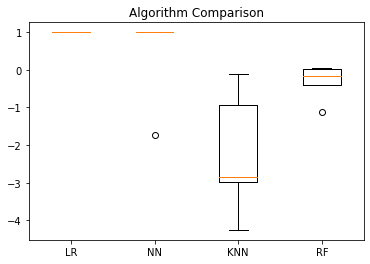

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import sklearn

import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning


# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
#models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        cv_results = cross_val_score(model, X_train, y_train, scoring='r2')

    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [13]:
from sklearn.metrics import make_scorer

def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5t/28jzvs016nq5vxslb670gs040000gn/T/ipykernel_3067/111347973.py", line 11, in <module>
    gsearch.fit(X_train, y_train)
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 838, in evaluate_candidates
    out = parallel(
  File "/usr/local/Caskroom/miniconda/base/envs/geobike/lib/python3.9/

TypeError: object of type 'NoneType' has no len()

In [15]:
y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

NameError: name 'best_model' is not defined